<a href="https://colab.research.google.com/github/rahimshavil/mini-projects-in-colab/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-- 1. RAM MALL DATA --
   Annual_Income  Spending_Score
0      28.973713       18.893886
1      30.181508       32.184239
2      23.126773       18.126904
3      37.633703       26.139478
4      21.244205       24.340480


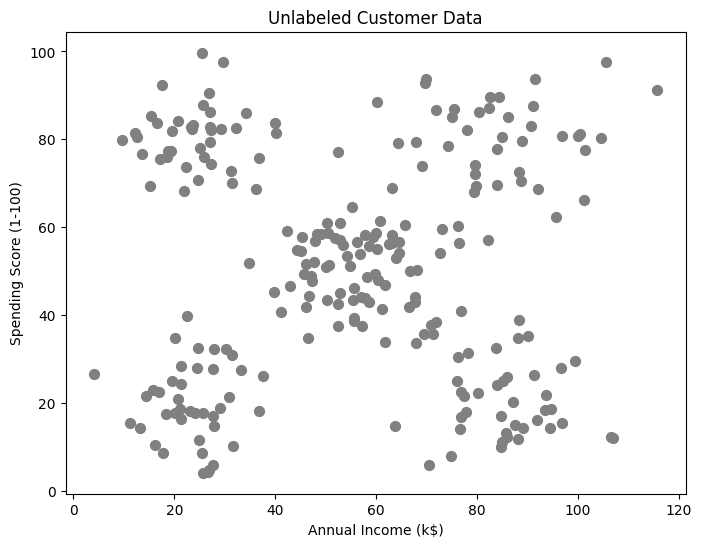


Calculating WCSS for Elbow Method...


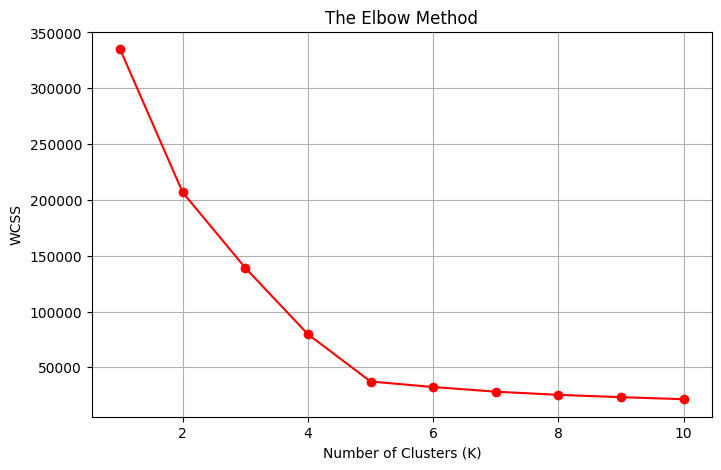

Look at the graph. The 'Elbow' (bend) is at K=5.


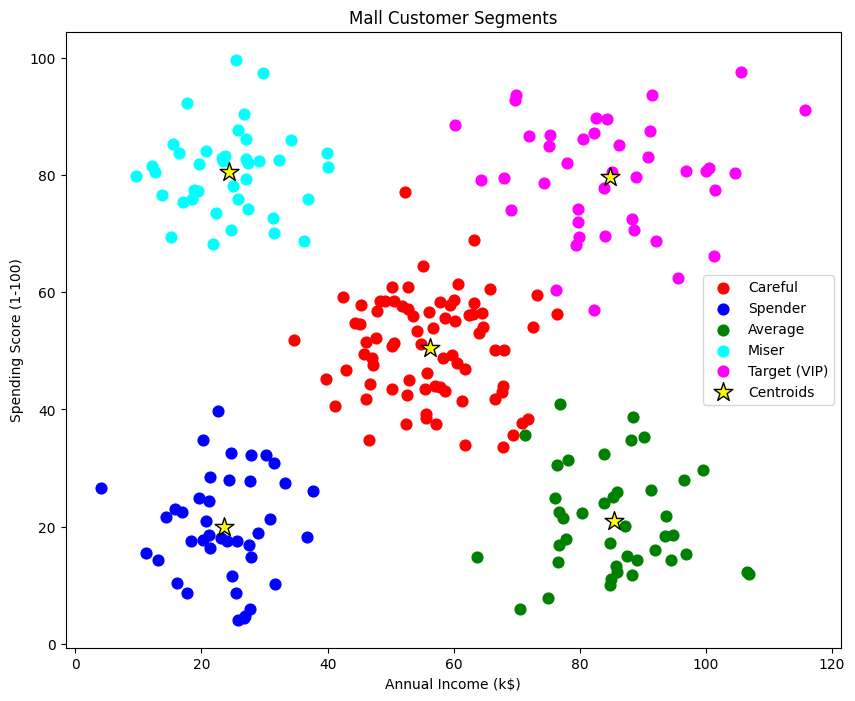


--- INSIGHTS FOR MARKETING ---
1. Target the Cyan/Magenta group (High Income, High Spend) with Luxury items.
2. Target the Blue group (Low Income, High Spend) with Sales/Discounts.
3. Don't waste ads on the Red group (Low Income, Low Spend).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# --- STEP 1: GENERATE SYNTHETIC MALL DATA ---
# Classic Dataset: Annual Income (k$) vs Spending Score (1-100)
# We naturally expect 5 groups in real malls:
# 1. Miser: High Income, Low Spend
# 2. Spender: Low Income, High Spend
# 3. Average: Average Income, Average Spend
# 4. Target: High Income, High Spend (The VIPs)
# 5. Careful: Low Income, Low Spend

np.random.seed(42)
n = 200

# Generating clusters manually to ensure they exist:
# Cluster 1: Low Income, Low Spend
c1 = np.random.normal([25, 20], 8, size=(40, 2))
# Cluster 2: Low Income, High Spend
c2 = np.random.normal([25, 80], 8, size=(40, 2))
# Cluster 3: Average
c3 = np.random.normal([55, 50], 10, size=(80, 2))
# Cluster 4: High Income, Low Spend
c4 = np.random.normal([85, 20], 10, size=(40, 2))
# Cluster 5: High Income, High Spend
c5 = np.random.normal([85, 80], 10, size=(40, 2))

# Combine
data = np.concatenate((c1, c2, c3, c4, c5))
df = pd.DataFrame(data, columns=['Annual_Income', 'Spending_Score'])

print("-- 1. RAM MALL DATA --")
print(df.head())

# --- STEP 2: VISUALIZE RAW DATA ---
plt.figure(figsize=(8, 6))
plt.scatter(df['Annual_Income'], df['Spending_Score'], c='gray', s=50)
plt.title('Unlabeled Customer Data')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# --- STEP 3: FIND OPTIMAL K (THE ELBOW METHOD) ---
print("\nCalculating WCSS for Elbow Method...")
wcss = []
for i in range(1, 11):
    # k-means++ ensures smarter initialization of centroids
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

print("Look at the graph. The 'Elbow' (bend) is at K=5.")

# --- STEP 4: TRAIN FINAL MODEL (K=5) ---
k_optimal = 5
kmeans_final = KMeans(n_clusters=k_optimal, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans_final.fit_predict(df)

# Add result to dataframe
df["Cluster"] = y_kmeans

# --- STEP 5: VISUALIZE CLUSTERS ---
plt.figure(figsize=(10, 8))

# Define colors for 5 clusters
colors = ["red", 'blue', 'green', 'cyan', 'magenta']
labels = ["Careful", 'Spender', 'Average', 'Miser', 'Target (VIP)']

# Plot each cluster
for i in range(k_optimal):
    plt.scatter(df[df["Cluster"] == i]['Annual_Income'],
                df[df["Cluster"] == i]['Spending_Score'],
                s=60, c=colors[i], label=labels[i])

# Plot Centroids (The "Center" of each group)
plt.scatter(kmeans_final.cluster_centers_[:, 0],
            kmeans_final.cluster_centers_[:, 1],
            s=200, c='yellow', marker='*', label='Centroids', edgecolor='black')

plt.title('Mall Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

print("\n--- INSIGHTS FOR MARKETING ---")
print("1. Target the Cyan/Magenta group (High Income, High Spend) with Luxury items.")
print("2. Target the Blue group (Low Income, High Spend) with Sales/Discounts.")
print("3. Don't waste ads on the Red group (Low Income, Low Spend).")
